In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from PIL import Image
from IPython.core.display import HTML
from functools import partial

from visprog.engine.utils import ProgramGenerator, ProgramInterpreter
from visprog.prompts.clevr import create_prompt

[2024-01-23 13:06:03,238] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [3]:
interpreter = ProgramInterpreter(dataset='clevr')

Registering LOC step
Registering BIG step
Registering SMALL step
Registering GRAY step
Registering RED step
Registering BLUE step
Registering GREEN step
Registering BROWN step
Registering PURPLE step
Registering CYAN step
Registering YELLOW step
Registering CUBE step
Registering SPHERE step
Registering CYLINDER step
Registering RUBBER step
Registering METAL step
Registering LEFTOF step
Registering RIGHTOF step
Registering FRONTOF step
Registering BEHIND step
Registering EQUALSIZE step
Registering EQUALMATERIAL step
Registering EQUALSHAPE step
Registering EQUALCOLOR step
Registering EVAL step
Registering RESULT step


In [4]:
prompter = partial(create_prompt,method='random', num_prompts=18)
generator = ProgramGenerator(prompter=prompter)

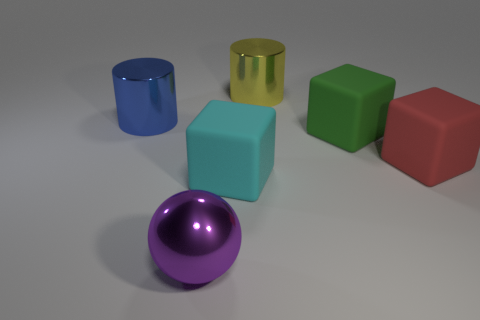

In [5]:
image = Image.open('/mmfs1/gscratch/balazinska/enhaoz/VOCAL-UDF/data/clevr/images/test/CLEVR_test_000006.png')
image.thumbnail((640,640),Image.Resampling.LANCZOS)
init_state = dict(
    IMAGE=image.convert('RGB')
)
image

In [6]:
# question = "a big object o1 is right of the brown cylinder o2 and left of the large brown sphere o3"
question = "a big blue block"
# question = "An cube has the same material as the gray object"
prog,_ = generator.generate(dict(question=question))
print(prog)
prog = "OBJ0=LOC(image=IMAGE,object='object')\nOBJ1=RUBBER(object=OBJ0)\nOBJ2=CUBE(object=OBJ1)\nOBJ3=BIG(object=OBJ0)\nREL1=FRONTOF(object1=OBJ2,object2=OBJ3)\nOBJ4=RUBBER(object=OBJ0)\nREL2=FRONTOF(object1=OBJ3,object2=OBJ4)\nREL3=LEFTOF(object1=OBJ3,object2=OBJ4)\nANSWER0=EVAL(expr=\"'yes' if len({OBJ2}) and len({OBJ3}) and len({OBJ4}) and len({REL1}) and len({REL2}) and len({REL3}) else 'no'\")\nFINAL_RESULT=RESULT(var=ANSWER0)"

Think step by step to answer the question.

Question: a red object right of the big gray object
Program:
OBJ0=LOC(image=IMAGE,object='object')
OBJ1=RED(object=OBJ0)
OBJ2=BIG(object=OBJ0)
OBJ3=GRAY(object=OBJ2)
REL1=LEFTOF(object1=OBJ3,object2=OBJ1)
ANSWER0=EVAL(expr="'yes' if len({OBJ1}) and len({OBJ3}) and len({REL1}) else 'no'")
FINAL_RESULT=RESULT(var=ANSWER0)

Question: a big object o1 is right of the gray cube o2 and left of the large gray sphere o3
Program:
OBJ0=LOC(image=IMAGE,object='object')
OBJ1=BIG(object=OBJ0)
OBJ2=GRAY(object=OBJ0)
OBJ3=CUBE(object=OBJ2)
OBJ4=BIG(object=OBJ0)
OBJ5=GRAY(object=OBJ4)
OBJ6=SPHERE(object=OBJ5)
REL1=LEFTOF(object1=OBJ3,object2=OBJ1)
REL2=LEFTOF(object1=OBJ1,object2=OBJ6)
ANSWER0=EVAL(expr="'yes' if len({OBJ1}) and len({OBJ3}) and len({OBJ6}) and len({REL1}) and len({REL2}) else 'no'")
FINAL_RESULT=RESULT(var=ANSWER0)

Question: A cube is in front of the big rubber sphere and on the left side of the big blue rubber object.
Program:
OBJ0=LOC(imag

In [7]:
result, prog_state, html_str = interpreter.execute(prog,init_state,inspect=True)

LOC
RUBBER
CUBE
BIG
FRONTOF
RUBBER
FRONTOF
LEFTOF
EVAL
RESULT


In [8]:
result

'yes'


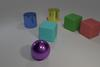
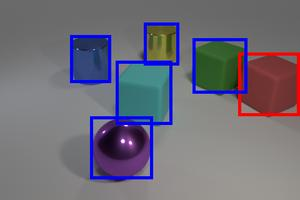
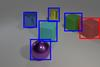
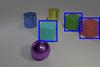
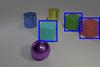
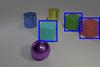
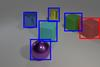
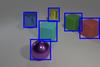
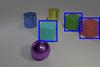
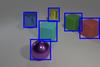
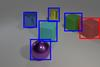
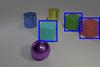
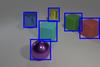
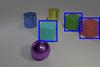
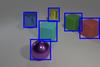
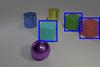

In [9]:
HTML(html_str)